In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State the null and alternative hypothesis. Null: The woman cannot tell, based on taste, which was added first. The probability of being correct is 0.5. Alternate: The woman can tell based on taste with consistency.

Step 2: Select a test statistic. n number of successes will be used (picked tea first). This should be 4. Xobs = 3.

x~Hypergeom(M=8,n=4,N=4) n is number of successes, N is number of selections.

Step 3: ...

In [2]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([3, 2, 2, 1, 3, 3, 3, 2, 1, 1])

Find probability that x is greater than or equal to 3 (p-value)

In [3]:
print(stats.hypergeom.pmf([3,4],M,n,N).sum())
print(1-stats.hypergeom.cdf(2,M,n,N))

0.24285714285714263
0.24285714285714288


Step 4: We fail to reject the null hypothesis

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null: the virginica species does not have a larger mean sepal width than that or versicolor (equal width). Alternate:The virginica species has a larger mean sepal width than that of versicolor.

Step 2: Test Statistic: Difference in the sample means measured.

Observed difference was 0.204 (shown below) and not 0. Where does this fall under the distribution? Use permutation test

Step 3: Find p-value

In [9]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
print(obs)
iris_sub

0.20399999999999974


species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


In [6]:
num_obs=iris_sub.num_rows
ts=[]
for i in np.arange(10000):
    iris_sample=iris_sub.with_column('sampled',iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

Step 4: Conclustion

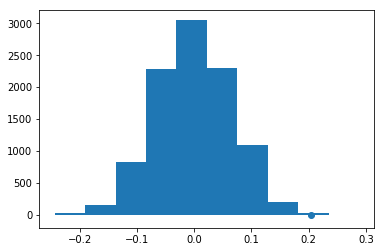

In [7]:
plt.hist(ts)
plt.scatter(obs,0)
plt.show()

In [8]:
p=np.mean(ts>=obs)
print('The p-value',p*100,'%', 'is statistically significant')

The p-value 0.13999999999999999 % is statistically significant


We have evidence to reject the null hypothesis.